In [2]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
rng = np.random

In [3]:
# parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50


In [4]:
# training data
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [5]:
# tf graph input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# set model weights
W = tf.Variable(rng.randn(),name = "weigths")
b = tf.Variable(rng.randn(),name = "bias")

In [6]:
# construct a linear model
pred = tf.add(tf.multiply(W,X),b)


In [7]:
# mean square error
cost = tf.reduce_sum(tf.pow(pred-Y,2))/(2*n_samples)

# gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [11]:
# initialize variables (i.e, assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.139957309 W= 0.38996089 b= -0.20832597
Epoch: 0100 cost= 0.132678434 W= 0.38161263 b= -0.14826886
Epoch: 0150 cost= 0.126240447 W= 0.3737608 b= -0.09178371
Epoch: 0200 cost= 0.120546035 W= 0.36637598 b= -0.03865783
Epoch: 0250 cost= 0.115509473 W= 0.35943046 b= 0.01130831
Epoch: 0300 cost= 0.111054778 W= 0.35289785 b= 0.058302816
Epoch: 0350 cost= 0.107114770 W= 0.3467539 b= 0.102502264
Epoch: 0400 cost= 0.103629954 W= 0.3409753 b= 0.14407311
Epoch: 0450 cost= 0.100547835 W= 0.3355403 b= 0.18317169
Epoch: 0500 cost= 0.097821862 W= 0.33042863 b= 0.21994478
Epoch: 0550 cost= 0.095410943 W= 0.32562104 b= 0.25453064
Epoch: 0600 cost= 0.093278699 W= 0.32109937 b= 0.28705928
Epoch: 0650 cost= 0.091392882 W= 0.3168464 b= 0.31765395
Epoch: 0700 cost= 0.089725100 W= 0.31284666 b= 0.34642836
Epoch: 0750 cost= 0.088250123 W= 0.30908474 b= 0.3734916
Epoch: 0800 cost= 0.086945638 W= 0.30554637 b= 0.39894614
Epoch: 0850 cost= 0.085792080 W= 0.30221862 b= 0.42288566
Epoch: 0900 co

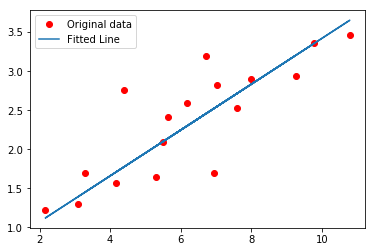

In [13]:
# start training 

with tf.Session() as sess:
    sess.run(init)
    
    # fit all training data
    for epoch in range(training_epochs):
        # The purpose of zip() is to map the similar index of multiple containers so that they can 
        # be used just using as single entity. 
        for (x,y) in zip(train_X,train_Y):
            sess.run(optimizer,feed_dict={X:x,Y:y})
            
        # display logs per each epoch
        
        if (epoch+1)%display_step == 0 :
            c = sess.run(cost,feed_dict={X:train_X,Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))
            
            
    print("Optimization finished!")
    training_cost = sess.run(cost,feed_dict={X:train_X,Y:train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')
    
    
    # graphic display
    plt.plot(train_X,train_Y,"ro",label='Original data')
    plt.plot(train_X,sess.run(W)*train_X+sess.run(b),label='Fitted Line')
    plt.legend()
    plt.show()